# Calibration Analysis

In [1]:
%matplotlib inline

*Libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot, autocorrelation_plot

*Global parameters*

In [3]:
scenario = 'sc1'

*Paths*

In [4]:
data_file = '../data/scenarios/'

## 1. Preprocessing

*Read file*

In [5]:
results = pd.read_csv('{}{}.csv'.format(data_file, scenario))

## 2. Visualization

*Plot raw incidence rate errors*

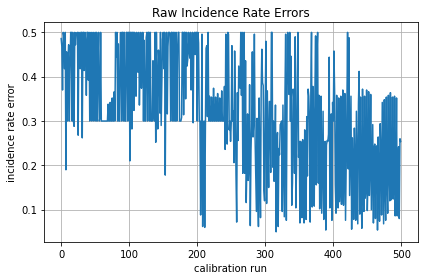

In [6]:
plt.figure()
plt.plot(results['IrE'])
plt.ylabel('incidence rate error')
plt.xlabel('calibration run')
plt.title('Raw Incidence Rate Errors')
plt.grid()
plt.tight_layout()
plt.show()

*Plot raw exposure rate errors*

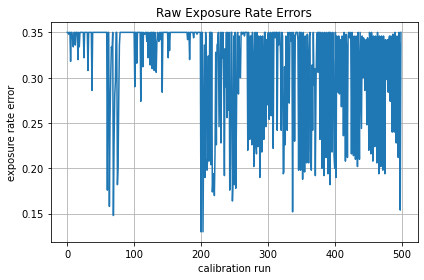

In [7]:
plt.figure()
plt.plot(results['ErE'])
plt.ylabel('exposure rate error')
plt.xlabel('calibration run')
plt.title('Raw Exposure Rate Errors')
plt.grid()
plt.tight_layout()
plt.show()

*Plot rewards*

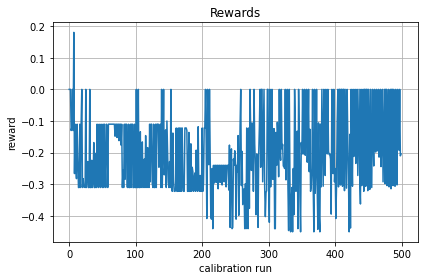

In [8]:
plt.figure()
plt.plot(results['Reward'])
plt.ylabel('reward')
plt.xlabel('calibration run')
plt.title('Rewards')
plt.grid()
plt.tight_layout()
plt.show()

## 3. Decomposition

*Decompose incidence rate errors*

In [9]:
incidence_rate_errors = seasonal_decompose(results['IrE'], period=20, model='additive')

*Plot IrE's decomposition*

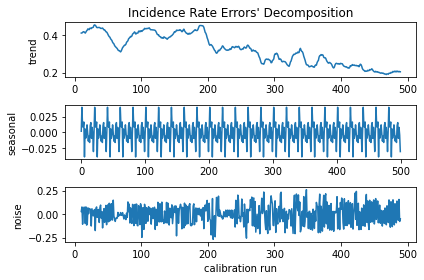

In [10]:
fig, axs = plt.subplots(3)
plt.xlabel('calibration run')
axs[0].plot(incidence_rate_errors.trend)
axs[0].set_ylabel('trend')
axs[0].title.set_text("Incidence Rate Errors' Decomposition")
axs[1].plot(incidence_rate_errors.seasonal)
axs[1].set_ylabel('seasonal')
axs[2].plot(incidence_rate_errors.resid)
axs[2].set_ylabel('noise')
plt.tight_layout()
plt.show()

*Decompose exposure rate errors*

In [11]:
exposure_rate_errors = seasonal_decompose(results['ErE'], period=20, model='additive')

*Plot ErE's decomposition*

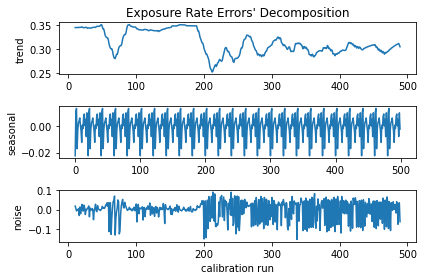

In [12]:
fig, axs = plt.subplots(3)
plt.xlabel('calibration run')
axs[0].plot(exposure_rate_errors.trend)
axs[0].set_ylabel('trend')
axs[0].title.set_text("Exposure Rate Errors' Decomposition")
axs[1].plot(exposure_rate_errors.seasonal)
axs[1].set_ylabel('seasonal')
axs[2].plot(exposure_rate_errors.resid)
axs[2].set_ylabel('noise')
plt.tight_layout()
plt.show()

## 4. Statistical analysis

*Remove NaN values*

In [13]:
ire_trend = pd.Series([e for e in incidence_rate_errors.trend if np.isnan(e) == False])

*Plot error trend*

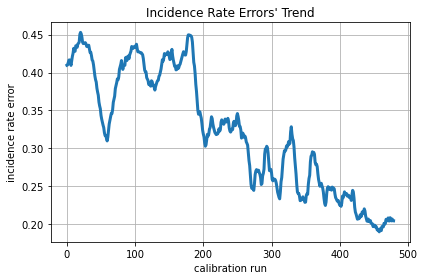

In [14]:
plt.figure()
plt.plot(ire_trend, linewidth=3)
plt.ylabel('incidence rate error')
plt.xlabel('calibration run')
plt.title("Incidence Rate Errors' Trend")
plt.tight_layout()
plt.grid()
plt.show()

*Plot lag scatter*

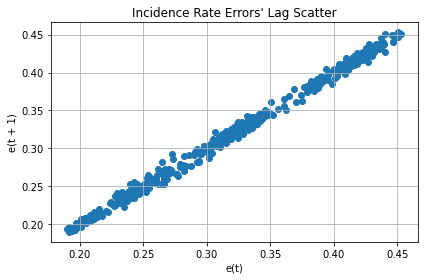

In [15]:
plt.figure()
lag_plot(ire_trend)
plt.ylabel('e(t + 1)')
plt.xlabel('e(t)')
plt.title("Incidence Rate Errors' Lag Scatter")
plt.tight_layout()
plt.grid()
plt.show()

*Plot autocorrelation*

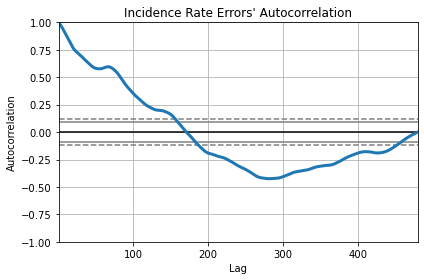

In [16]:
plt.figure()
autocorrelation_plot(ire_trend, linewidth=3)
plt.title("Incidence Rate Errors' Autocorrelation")
plt.tight_layout()
plt.show()

*Apply moving average smoothing*

In [17]:
ire_rolling = ire_trend.rolling(window=20)
ire_rolling_mean = ire_rolling.mean()
ire_rolling_mean = pd.Series([e for e in ire_rolling_mean if np.isnan(e) == False])

*Plot smoothed error trend*

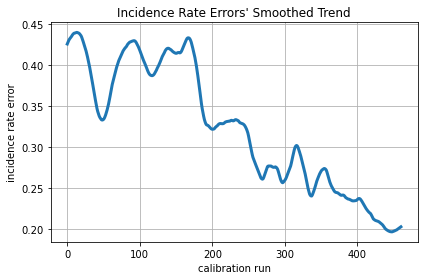

In [18]:
plt.figure()
plt.plot(ire_rolling_mean, linewidth=3)
plt.ylabel('incidence rate error')
plt.xlabel('calibration run')
plt.title("Incidence Rate Errors' Smoothed Trend")
plt.grid()
plt.tight_layout()
plt.show()

*Compute Augmented Dickey-Fuller test*

In [19]:
adf_test = adfuller(ire_trend)
print('p-value = {:0.2f}'.format(adf_test[1]))

p-value = 0.73
